### Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Read and view the Price index data  

In [2]:
d=pd.read_csv("C:/Users/hp/Downloads/CSUSHPISA.csv")
d

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.132
4,1987-05-01,65.565
...,...,...
420,2022-01-01,284.767
421,2022-02-01,290.371
422,2022-03-01,296.496
423,2022-04-01,301.704


### Read and view the Unemployment rate data 

In [3]:
d2=pd.read_csv("C:/Users/hp/Downloads/UNRATE.csv")
d2

,DATE,UNRATE
0,1987-01-01,6.6
1,1987-02-01,6.6
2,1987-03-01,6.6
3,1987-04-01,6.3
4,1987-05-01,6.3
...,...,...
420,2022-01-01,4.0
421,2022-02-01,3.8
422,2022-03-01,3.6
423,2022-04-01,3.6


In [4]:
# Checking for duplicate values in Price Index data
d.duplicated().sum()

0

In [5]:
# Checking for duplicate values in Unemployment Rate data
d2.duplicated().sum()

0

In [6]:
# Checking the whole information about the d dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       425 non-null    object 
 1   CSUSHPISA  425 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [7]:
# Checking the whole information about the d2 dataset
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    425 non-null    object 
 1   UNRATE  425 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [8]:
# Statistical information of d data
d.describe()

,CSUSHPISA
count,425.000000
mean,135.887280
std,53.684802
min,63.965000
25%,81.620000
50%,139.727000
75%,174.802000
max,304.831000


In [9]:
# Statistical information of d2 data
d2.describe()

,UNRATE
count,425.000000
mean,5.849647
std,1.654584
min,3.500000
25%,4.700000
50%,5.500000
75%,6.600000
max,14.700000


#### After performing all the checks both dataset looks fine. So data cleaning is not required. 

In [10]:
# Checking to see if the DATE columns in both d and d2 are same
d['DATE'].equals(d2['DATE']) 

True

#### As 'True' is returned above the DATE columns for both dataset are same. 

### Merging columns UNRATE and PRICE from d and d2 and creating a new dataframe - new 

In [11]:
new=pd.DataFrame({'UNRATE':d2['UNRATE'],'PRICE':d['CSUSHPISA']})

In [12]:
new

,UNRATE,PRICE
0,6.6,63.965
1,6.6,64.424
2,6.6,64.735
3,6.3,65.132
4,6.3,65.565
...,...,...
420,4.0,284.767
421,3.8,290.371
422,3.6,296.496
423,3.6,301.704


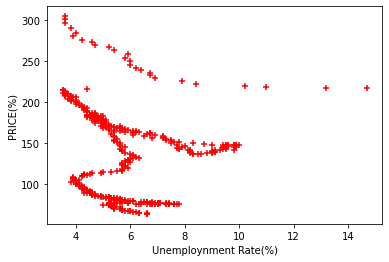

In [13]:
# Scatter plot to see the distribution of data
plt.scatter(new.UNRATE,new.PRICE,color='red',marker='+')
plt.xlabel('Unemploynment Rate(%)')
plt.ylabel('PRICE(%)')
plt.show()

### Creating the linear regression object - reg

In [14]:
reg=linear_model.LinearRegression()

### Fitting the data. It means training the linear regression model using available data points 

In [15]:
reg.fit(new[['UNRATE']],new.PRICE)

LinearRegression()

### Predicting price when unrate= 6.6

In [16]:
a=[6.6]
r=reg.predict([a])
print("UNRATE={}".format(a))
print("Predicted price={}".format(r[0]))

UNRATE=[6.6]
Predicted price=132.99884589021855


### Viewing actual prices when unrate=6.6

In [17]:
new.loc[new['UNRATE'] == 6.6]

,UNRATE,PRICE
0,6.6,63.965
1,6.6,64.424
2,6.6,64.735
49,6.6,75.735
82,6.6,78.149
84,6.6,78.592
85,6.6,78.727
324,6.6,161.948


### Regession plot 

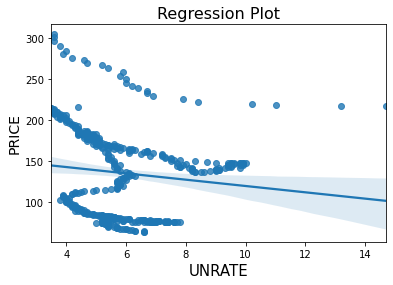

In [18]:
sns.regplot(y=new['PRICE'],x=new['UNRATE'])
plt.title('Regression Plot',size=16)
plt.ylabel('PRICE',size=14)
plt.xlabel('UNRATE',size=15)
plt.show()

#### As there is difference between actual and predicted values, I am going to split the data into train data and test data. Then I will train the model using the train data and test data. 

In [19]:
# Assigning the columns to x and y
x=new.iloc[:,:-1].values
y=new.iloc[:,1].values

### Training the model 

In [20]:
# Already imported the 'train_test_split' from sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [21]:
# Checking the shape of x and y
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 1)
(107, 1)
(318,)
(107,)


In [22]:
# Repeting the model training for test_size =0.1
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(382, 1)
(43, 1)
(382,)
(43,)


In [25]:
# Statistical information of the train and test data
print(np.mean(x_train.shape))
print(np.mean(x_test.shape))
print(np.mean(y_train.shape))
print(np.mean(y_test.shape))

191.5
22.0
382.0
43.0


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [27]:
print(np.mean(x_train.shape))
print(np.mean(x_test.shape))
print(np.mean(y_train.shape))
print(np.mean(y_test.shape))

170.5
43.0
340.0
85.0


### Fitting the data to the linear regression model 

In [28]:
l=LinearRegression()
l.fit(x_train,y_train)
print("train test complete")

train test complete


### Prediction of price 

In [29]:
y_pred=l.predict(x_test)

In [30]:
prediction=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
prediction

,Actual,Predicted
0,112.163,136.473544
1,77.429,131.522679
2,84.453,134.759783
3,201.646,137.425633
4,94.218,136.663961
...,...,...
80,178.800,134.950201
81,290.371,137.425633
82,157.527,134.378947
83,77.795,131.903515


### Finding the mean absolute error 

In [31]:
from sklearn.metrics import mean_absolute_error
print('mean absolute error',mean_absolute_error(y_test,y_pred))

mean absolute error 46.08932414930294


#### Mean absolute error of 46 is not very good. 

### Prediction for a known value UNRATE= 6.6 

In [32]:
unrate=[6.6]
r=l.predict([unrate])
print("Unrate={}".format(unrate))
print("Predicted Price={}".format(r[0]))

Unrate=[6.6]
Predicted Price=132.09393250671437


#### The predicted value by both method is PRICE = 132 when UNRATE= 6.6